### The dataset is taken from UtkML's Twitter Spam Detection Competition hosted by Kaggle
Twitter spam is unwanted content manifesting in many ways! Including bulk messages, profanity, insults, hate speech, malicious links, and fraudulent reviews. Lets tackle this problem by building a classifier to detect when a tweet is "Quality" content or "Spam"!

##### There are two files namely train.csv and test.csv

##### 1) Training set - train.csv contains 8 columns namely 'Id,' 'tweet', 'following', 'followers', 'actions', 'is_retweet', 'location', 'Type' and 11968 rows
##### 2) Test set - test.csv contains 7 columns namely 'Id,' 'tweet', 'following', 'followers', 'actions', 'is_retweet', 'location' and 630 rows


### Importing libraries

In [1]:
'''Importing pandas library to read csv files and to perform data processing'''
import pandas as pd

'''Importing numpy library to perform operations on multidimensional arrays/matrices (linear algebra)'''
import numpy as np

# Data Preprocessing
'''Importing re library to perform regex operations'''
import re

'''Importing set of libraries for natural language processing'''
import nltk

'''Importing stopwords from nltk. Stopwords are the words which are more common in any document and do not add much 
meaning to a sentence and hence are removed while text preprocessing'''
from nltk.corpus import stopwords

'''Importing PorterStemmer Library from nltk. It is most common stemmer used to produce morphological variants of a root/
base word'''
from nltk.stem.porter import PorterStemmer

'''Importing WordNetLemmatizer library from nltk. It follows process of Lemmatization where different inflected forms of 
word are grouped together to be analyzed as single term.''' 
from nltk.stem import WordNetLemmatizer

'''The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature 
vectors into a representation that is more suitable for the downstream estimators.'''
from sklearn import preprocessing

'''Sequentially apply a list of transforms and a final estimator.'''
from sklearn.pipeline import Pipeline

'''Concatenates results of multiple transformer objects.'''
from sklearn.pipeline import FeatureUnion

'''Base class for all estimators in scikit-learn.'''
'''Mixin class for all transformers in scikit-learn.'''
from sklearn.base import BaseEstimator, TransformerMixin

'''Convert a collection of raw documents to a matrix of TF-IDF features.'''
from sklearn.feature_extraction.text import TfidfVectorizer

'''Standardize features by removing the mean and scaling to unit variance.'''
from sklearn.preprocessing import StandardScaler

'''Binarize labels in a one-vs-all fashion.'''
from sklearn.preprocessing import LabelBinarizer

# Data Visualization
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

# Models
'''Supervised ML models'''
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Training and Testing
'''train_test_split is library from sklearn used to split original dataset into two subsets for training and testing data.'''
from sklearn.model_selection import train_test_split

# Evaluation
'''Importing accuracy_score module from sklearn.metrics to retrive the accuracy of the classification model'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Reading Train data

In [2]:
# Reading train.csv file and storing it in dataframe
train = pd.read_csv("train.csv")

# Listing first 5 rows of train dataset
train.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [3]:
# Printing information about train dataset including datatype and columns  
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          11968 non-null  int64  
 1   Tweet       11968 non-null  object 
 2   following   11823 non-null  float64
 3   followers   11952 non-null  float64
 4   actions     9195 non-null   float64
 5   is_retweet  11967 non-null  float64
 6   location    10317 non-null  object 
 7   Type        11968 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 748.1+ KB


In [4]:
# Listing datatypes with column names in train set
train.dtypes

Id              int64
Tweet          object
following     float64
followers     float64
actions       float64
is_retweet    float64
location       object
Type           object
dtype: object

In [5]:
# Listing labels in train set
labels = train['Type'].unique()
labels

array(['Quality', 'Spam'], dtype=object)

In [6]:
# Drooping rows having null values
train = train.dropna()
train.shape

(8240, 8)

In [7]:
# Counting the numbers of rows with given labels (Spam and Quality)
freqDict = nltk.FreqDist(train.Type)
freqDict

FreqDist({'Spam': 5812, 'Quality': 2428})

### Data Preprocessing

In [8]:
# Setting stopwords as english
stopWord = stopwords.words('english')

#### Cleaning Data

In [9]:
def clean_text(text):
    
    # lowering text
    text = text.lower()
    
    # transforming abbreviations
    text = re.sub("what's", "what is ", text)
    text = re.sub("\'s", " ", text)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not ", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am ", text)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("\'scuse", " excuse ", text)
    text = re.sub('\s+', ' ', text)
    
    # removing urls
    text = re.sub(r'http\S+', '', text)
    
    text = text.split()
    # removing stopwords
    text = " ".join([word for word in text if not word in stopWord])
    
    # removing punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    text = text.strip(' ')
    
    return text

In [10]:
# Adding new column 'PreprocessedTweet' and storing clean/preprocessed text in that column
train['PreprocessedTweet'] = train['Tweet'].apply(lambda x: clean_text(x)) 
train.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,PreprocessedTweet
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,jan idiot chelsea handler diagnoses trump disease
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,pedophile anthony weiner terrified getting bea...
5,9572,EBMUD ending penalties for excessive water use...,4435.0,16041.0,27750.0,0.0,UPS,Spam,ebmud ending penalties excessive water users
6,10792,Big day. #WeTheNorth #yyz #thesix #sunset #sk...,0.0,0.0,0.0,0.0,"Toronto, ON",Quality,big day wethenorth yyz thesix sunset skyline six
8,12594,**MISSING**\nA male tabby cat has gone missing...,39000.0,46900.0,47.0,0.0,UK,Quality,missing male tabby cat gone missing n10 area l...


In [11]:
# Performing lemmatization
train['PreprocessedTweet'] = [nltk.word_tokenize(text) for text in train.PreprocessedTweet]
lemma = nltk.WordNetLemmatizer()
train.PreprocessedTweet = train.apply(lambda x: [lemma.lemmatize(word) for word in x.PreprocessedTweet], axis=1)
train.PreprocessedTweet = train.apply(lambda x: " ".join(x.PreprocessedTweet),axis=1)
train.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,PreprocessedTweet
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,jan idiot chelsea handler diagnosis trump disease
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,pedophile anthony weiner terrified getting bea...
5,9572,EBMUD ending penalties for excessive water use...,4435.0,16041.0,27750.0,0.0,UPS,Spam,ebmud ending penalty excessive water user
6,10792,Big day. #WeTheNorth #yyz #thesix #sunset #sk...,0.0,0.0,0.0,0.0,"Toronto, ON",Quality,big day wethenorth yyz thesix sunset skyline six
8,12594,**MISSING**\nA male tabby cat has gone missing...,39000.0,46900.0,47.0,0.0,UK,Quality,missing male tabby cat gone missing n10 area l...


### Word Frequencies

In [12]:
spam_text = []
spam_df = train[train.Type=="Spam"]

for i in range(0,len(spam_df)):
    spam_text.append(spam_df.PreprocessedTweet.iloc[i])
    
quality_text = []
quality_df = train[train.Type=="Quality"]

for i in range(0,len(quality_df)):
    quality_text.append(quality_df.PreprocessedTweet.iloc[i])


Below is the plot of 50 most commonly used words in SPAM tweets


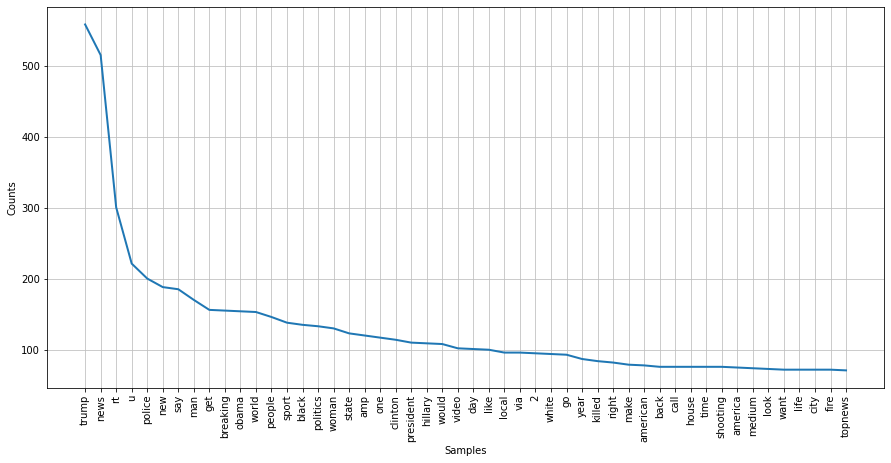


Below is the plot of 50 most commonly used words in QUALITY tweets


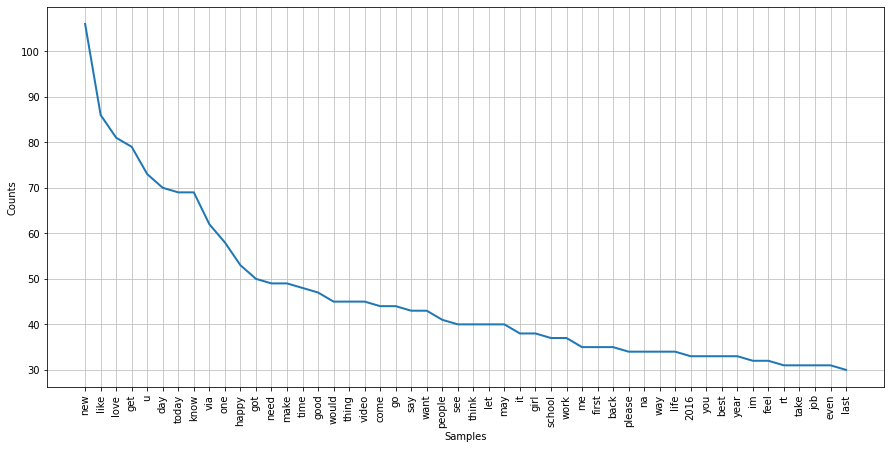

In [13]:
spam_text = ' '.join(spam_text).split()
freq = nltk.FreqDist(spam_text)

print("\nBelow is the plot of 50 most commonly used words in SPAM tweets")
plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)

quality_text = ' '.join(quality_text).split()
freq = nltk.FreqDist(quality_text)
print("\nBelow is the plot of 50 most commonly used words in QUALITY tweets")

plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)

### Function to return ngram words

In [14]:
from itertools import combinations 
from collections import Counter

def ngram(lines,i): 
    pair_counter = Counter() 
    for line in lines: 
        unique_tokens = sorted(set(line))
        combos = combinations(unique_tokens, i) 
        pair_counter += Counter(combos) 
    return pair_counter

### Applying 1-gram, bi-gram and tri-gram models on Spam datapoints

In [15]:
spam_df = train[train.Type=="Spam"] 
quality_df = train[train.Type=="Quality"]

lines = [] 
for i in range(0,len(spam_df)): 
    tokens = spam_df.PreprocessedTweet.iloc[i].split() 
    lines.append(tokens)

one_gram_spam = ngram(lines,1) 
bi_gram_spam = ngram(lines,2) 
tri_gram_spam = ngram(lines,3)

### Applying 1-gram, bi-gram and tri-gram models on Quality datapoints

In [16]:
lines = [] 
for i in range(0,len(quality_df)): 
    tokens = quality_df.PreprocessedTweet.iloc[i].split() 
    lines.append(tokens)

one_gram_ham = ngram(lines,1) 
bi_gram_ham = ngram(lines,2) 
tri_gram_ham = ngram(lines,3)

### Top 10 word occurences in Spam tweets (uni-gram, bi-gram & tri-gram models)

In [17]:
one_gram_spam.most_common(10)

[(('trump',), 527),
 (('news',), 512),
 (('rt',), 292),
 (('u',), 209),
 (('police',), 198),
 (('new',), 185),
 (('say',), 185),
 (('man',), 163),
 (('breaking',), 156),
 (('world',), 154)]

In [18]:
bi_gram_spam.most_common(10)

[(('news', 'world'), 109),
 (('president', 'trump'), 52),
 (('donald', 'trump'), 46),
 (('rt', 'trump'), 41),
 (('clinton', 'hillary'), 38),
 (('news', 'say'), 36),
 (('korea', 'north'), 35),
 (('house', 'white'), 33),
 (('news', 'u'), 32),
 (('breaking', 'trump'), 29)]

In [19]:
tri_gram_spam.most_common(10)

[(('news', 'u', 'world'), 15),
 (('president', 'rt', 'trump'), 14),
 (('islamic', 'news', 'state'), 14),
 (('breaking', 'korea', 'north'), 13),
 (('news', 'say', 'world'), 12),
 (('korea', 'north', 'trump'), 11),
 (('black', 'life', 'matter'), 10),
 (('attack', 'news', 'world'), 10),
 (('ccot', 'pjnet', 'tcot'), 9),
 (('news', 'syria', 'world'), 9)]

### Top 10 word occurences in Quality tweets (uni-gram, bi-gram & tri-gram models)

In [20]:
one_gram_ham.most_common(10)

[(('new',), 102),
 (('like',), 80),
 (('love',), 75),
 (('get',), 74),
 (('u',), 70),
 (('today',), 68),
 (('know',), 67),
 (('day',), 66),
 (('via',), 62),
 (('one',), 54)]

In [21]:
bi_gram_ham.most_common(10)

[(('birthday', 'happy'), 24),
 (('na', 'wan'), 16),
 (('gon', 'na'), 15),
 (('photo', 'posted'), 12),
 (('all_in', 'monsta_x'), 9),
 (('know', 'love'), 9),
 (('via', 'youtube'), 9),
 (('new', 'posted'), 9),
 (('video', 'youtube'), 9),
 (('good', 'morning'), 8)]

In [22]:
tri_gram_ham.most_common(10)

[(('facebook', 'new', 'posted'), 8),
 (('facebook', 'new', 'photo'), 6),
 (('facebook', 'photo', 'posted'), 6),
 (('new', 'photo', 'posted'), 6),
 (('out', 'story', 'via'), 6),
 (('liked', 'video', 'youtube'), 6),
 (('all_in', 'monsta_x', '몬스타엑스'), 6),
 (('anthony', 'biggie', 'center'), 5),
 (('anthony', 'biggie', 'fat'), 5),
 (('anthony', 'biggie', 'got'), 5)]

### Word Cloud for Spam tweets

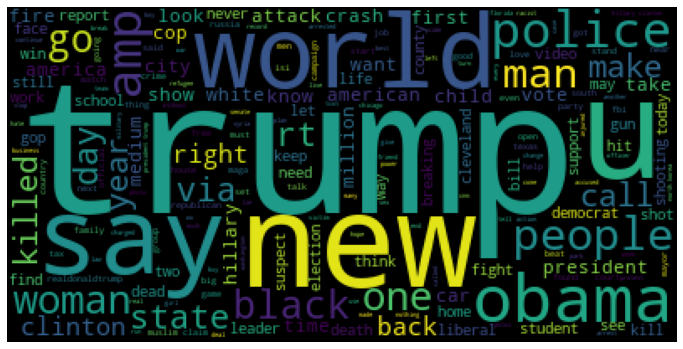

In [23]:
text = ''
for i in range(0,len(spam_df)):
    text = text + str(spam_df.PreprocessedTweet.iloc[i])

plt.figure(figsize=(12,9))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Clouds for Quality tweets

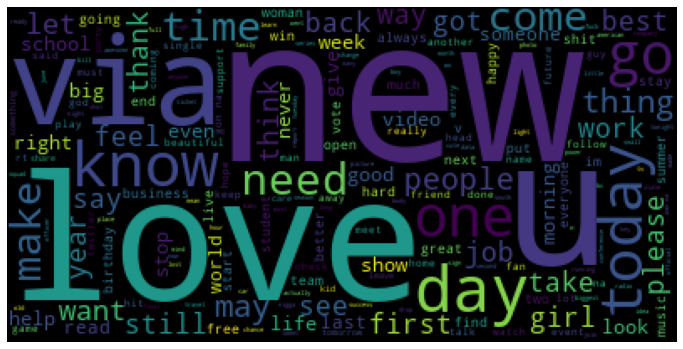

In [24]:
text = ''
for i in range(0,len(quality_df)):
    text = text + str(quality_df.PreprocessedTweet.iloc[i])

plt.figure(figsize=(12,9))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
# Label Encoding the location column

# create the Label encoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train['location'] = le.fit_transform(train['location'])
#display the initial records
train.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,PreprocessedTweet
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,222,Spam,jan idiot chelsea handler diagnosis trump disease
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,316,Spam,pedophile anthony weiner terrified getting bea...
5,9572,EBMUD ending penalties for excessive water use...,4435.0,16041.0,27750.0,0.0,1896,Spam,ebmud ending penalty excessive water user
6,10792,Big day. #WeTheNorth #yyz #thesix #sunset #sk...,0.0,0.0,0.0,0.0,1851,Quality,big day wethenorth yyz thesix sunset skyline six
8,12594,**MISSING**\nA male tabby cat has gone missing...,39000.0,46900.0,47.0,0.0,1889,Quality,missing male tabby cat gone missing n10 area l...


In [26]:
# Label Encoding the Type column

# create the Label encoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train['Type'] = le.fit_transform(train['Type'])
#display the initial records
train.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,PreprocessedTweet
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,222,1,jan idiot chelsea handler diagnosis trump disease
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,316,1,pedophile anthony weiner terrified getting bea...
5,9572,EBMUD ending penalties for excessive water use...,4435.0,16041.0,27750.0,0.0,1896,1,ebmud ending penalty excessive water user
6,10792,Big day. #WeTheNorth #yyz #thesix #sunset #sk...,0.0,0.0,0.0,0.0,1851,0,big day wethenorth yyz thesix sunset skyline six
8,12594,**MISSING**\nA male tabby cat has gone missing...,39000.0,46900.0,47.0,0.0,1889,0,missing male tabby cat gone missing n10 area l...


### Training the model

In [27]:
# Listing all features
features= [c for c in train.columns.values if c not in ['Id', 'Tweet', 'Type']]
print("Features: ",features)

Features:  ['following', 'followers', 'actions', 'is_retweet', 'location', 'PreprocessedTweet']


In [28]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train['Type'], 
                                                    test_size=.2, 
                                                    random_state=42)

#### Creating a pipeline

In [29]:
# Creating a transformer for text/categorical columns
class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]

In [30]:
# Creating a transformer for numerical columns
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [31]:
# Creating pipeline for text and performing tfidf vectorization
tweet = Pipeline([
                ('selector', TextSelector(key='PreprocessedTweet')),
                ('tfidf', TfidfVectorizer( stop_words='english', max_features=1000))
            ])

In [32]:
following =  Pipeline([
                ('selector', NumberSelector(key='following')),
                ('standard', StandardScaler())
            ])
followers =  Pipeline([
                ('selector', NumberSelector(key='followers')),
                ('standard', StandardScaler())
            ])
actions =  Pipeline([
                ('selector', NumberSelector(key='actions')),
                ('standard', StandardScaler())
            ])
is_retweet =  Pipeline([
                ('selector', NumberSelector(key='is_retweet')),
                ('standard', StandardScaler())
            ])
location =  Pipeline([
                ('selector', NumberSelector(key='location')),
                ('standard', StandardScaler())
            ])


#### Implementing feature union

In [33]:
feats = FeatureUnion([
                      ('tweet', tweet), 
                      ('following', following),
                      ('followers', followers),
                      ('actions', actions),
                      ('is_retweet', is_retweet),
                      ('location', location),
])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

<6592x1005 sparse matrix of type '<class 'numpy.float64'>'
	with 56535 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [34]:
lr = Pipeline([
        ('features', feats),
        ('LogisticRegression', LogisticRegression(random_state = 0,max_iter=1500)),
])
lr.fit(X_train, y_train)

preds = lr.predict(X_test)
print("Accuracy using Logistic Regression: ",np.mean(preds == y_test))
print("Weighted F1 score: ", f1_score(y_test, preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, preds, average="micro"))

Accuracy using Logistic Regression:  0.9550970873786407
Weighted F1 score:  0.9557517427443055
Macroavg F1 score:  0.9483925134613138
Microavg F1 score:  0.9550970873786407


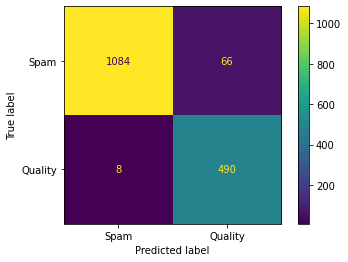

In [35]:
labels = ['Spam', 'Quality']
cm = confusion_matrix(y_test, preds, labels=train['Type'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

### Support Vector Classifier

In [36]:
svc = Pipeline([
        ('features', feats),
        ('SupportVectorClassifier', LinearSVC()),
])
svc.fit(X_train, y_train)

preds = svc.predict(X_test)
print("Accuracy using Support Vector Classifier: ",np.mean(preds == y_test))
print("Weighted F1 score: ", f1_score(y_test, preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, preds, average="micro"))

Accuracy using Support Vector Classifier:  0.9587378640776699
Weighted F1 score:  0.9591093325564056
Macroavg F1 score:  0.9519858781994703
Microavg F1 score:  0.9587378640776699


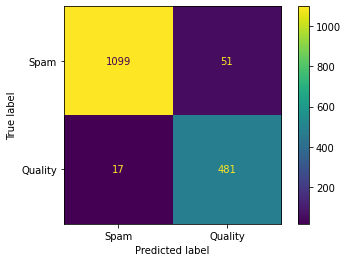

In [37]:
labels = ['Spam', 'Quality']
cm = confusion_matrix(y_test, preds, labels=train['Type'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

### Stochastic Gradient Descent

In [38]:
sgd = Pipeline([
        ('features', feats),
        ('SGDClassifier', SGDClassifier()),
])
sgd.fit(X_train, y_train)

preds = sgd.predict(X_test)
print("Accuracy using Stochastic Gradient Descent: ",np.mean(preds == y_test))
print("Weighted F1 score: ", f1_score(y_test, preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, preds, average="micro"))

Accuracy using Stochastic Gradient Descent:  0.9575242718446602
Weighted F1 score:  0.9580284101043283
Macroavg F1 score:  0.9508827982499016
Microavg F1 score:  0.9575242718446602


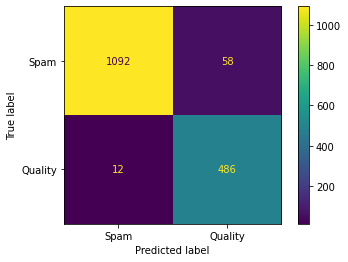

In [39]:
labels = ['Spam', 'Quality']
cm = confusion_matrix(y_test, preds, labels=train['Type'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

### Random Forest Classifier

In [40]:
rf = Pipeline([
    ('features',feats),
    ('RandomForestClassifier', RandomForestClassifier(random_state = 42)),
])

rf.fit(X_train, y_train)

preds = rf.predict(X_test)
print("Accuracy using Random Forest Classifier: ",np.mean(preds == y_test))
print("Weighted F1 score: ", f1_score(y_test, preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, preds, average="micro"))

Accuracy using Random Forest Classifier:  0.9975728155339806
Weighted F1 score:  0.9975728155339806
Macroavg F1 score:  0.9971224026540946
Microavg F1 score:  0.9975728155339806


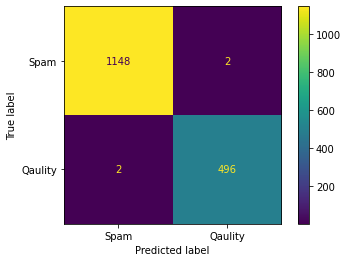

In [41]:
labels = ['Spam', 'Qaulity']
cm = confusion_matrix(y_test, preds, labels=train['Type'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()

### Reading test data

In [42]:
# Reading test.csv file and storing it in dataframe
test = pd.read_csv("test.csv")

# Listing first 5 rows of test dataset
test.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi
1,1,I only learned to dream in sound #love,63.0,55,508.0,0,england
2,2,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest
4,4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          630 non-null    int64  
 1   Tweet       630 non-null    object 
 2   following   623 non-null    float64
 3   followers   630 non-null    int64  
 4   actions     483 non-null    float64
 5   is_retweet  630 non-null    int64  
 6   location    550 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ KB


In [44]:
# Dropping rows with null values
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          426 non-null    int64  
 1   Tweet       426 non-null    object 
 2   following   426 non-null    float64
 3   followers   426 non-null    int64  
 4   actions     426 non-null    float64
 5   is_retweet  426 non-null    int64  
 6   location    426 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.6+ KB


In [45]:
test.drop(columns="Id", inplace=True)
test.head()

,Tweet,following,followers,actions,is_retweet,location
0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi
1,I only learned to dream in sound #love,63.0,55,508.0,0,england
3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest
4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502
5,RIP list of black people killed by police. Thi...,4155.0,3561,1550.0,1,"Shreveport, LA"


### Data Preprocessing

In [46]:
# Adding new column 'PreprocessedTweet' and storing clean/preprocessed text in that column
test['PreprocessedTweet'] = test['Tweet'].apply(lambda x: clean_text(x)) 
test.head()

,Tweet,following,followers,actions,is_retweet,location,PreprocessedTweet
0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi,obama criminal enterprise collapsing tcot maga...
1,I only learned to dream in sound #love,63.0,55,508.0,0,england,learned dream sound love
3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest,get liberty pineapplepizza
4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502,gm uaw workers receive profitsharing 11000
5,RIP list of black people killed by police. Thi...,4155.0,3561,1550.0,1,"Shreveport, LA",rip list black people killed police list conti...


In [47]:
# Performing lemmatization
test['PreprocessedTweet'] = [nltk.word_tokenize(text) for text in test.PreprocessedTweet]
lemma = nltk.WordNetLemmatizer()
test.PreprocessedTweet = test.apply(lambda x: [lemma.lemmatize(word) for word in x.PreprocessedTweet], axis=1)
test.PreprocessedTweet = test.apply(lambda x: " ".join(x.PreprocessedTweet),axis=1)
test.head()

,Tweet,following,followers,actions,is_retweet,location,PreprocessedTweet
0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi,obama criminal enterprise collapsing tcot maga...
1,I only learned to dream in sound #love,63.0,55,508.0,0,england,learned dream sound love
3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest,get liberty pineapplepizza
4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502,gm uaw worker receive profitsharing 11000
5,RIP list of black people killed by police. Thi...,4155.0,3561,1550.0,1,"Shreveport, LA",rip list black people killed police list conti...


In [48]:
# Label encoding the location column

# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
test['location'] = le.fit_transform(test['location'])
#display the initial records
test.head()

,Tweet,following,followers,actions,is_retweet,location,PreprocessedTweet
0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,104,obama criminal enterprise collapsing tcot maga...
1,I only learned to dream in sound #love,63.0,55,508.0,0,179,learned dream sound love
3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,153,get liberty pineapplepizza
4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,6,gm uaw worker receive profitsharing 11000
5,RIP list of black people killed by police. Thi...,4155.0,3561,1550.0,1,144,rip list black people killed police list conti...


In [49]:
feature_processing.fit_transform(test)

<426x1005 sparse matrix of type '<class 'numpy.float64'>'
	with 4096 stored elements in Compressed Sparse Row format>

#### Label Binarizer

In [50]:
lb = LabelBinarizer()
label = ["Spam","Quality"]
lb.fit_transform(label)

array([[1],
       [0]])

### Predictions using Logistic Regression

In [52]:
lr.predict(test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [53]:
lb.inverse_transform(lr.predict(test))

array(['Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam',
       'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam',
       'Quality', 'Quality', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam',
       'Quality', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam',
       'Spam', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality',
       'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Quality', 'Quality',
       'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality',
       'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam',
       'Quality', 'Spam', 'Quality', 'Spam', 'Spam', 'Quality', 'Quality',
       'Spam', 'Quality', 'Quality', 'Quality', 'Spam', 'Quality', 'Spam',
       'Spam', 'Quality', 'Spam', 'Quality', 'Quality', 'Spam',

### Predictions using Stochastic Gradient Descent

In [54]:
sgd.predict(test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [55]:
lb.inverse_transform(sgd.predict(test))

array(['Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam',
       'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Quality', 'Spam', 'Spam', 'Quality', 'Quality', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Quality', 'Spam',
       'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam',
       'Quality', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Quality',
       'Quality', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Quality',
       'Spam', 'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam',
  

### Predictions using Support Vector Classifier

In [56]:
svc.predict(test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [57]:
lb.inverse_transform(svc.predict(test))

array(['Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam',
       'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Quality', 'Spam', 'Spam', 'Quality', 'Quality', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Quality', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam',
       'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Quality', 'Spam',
       'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Quality', 'Spam',
       'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
      

### Predictions using Random Forest Classifier

In [58]:
rf.predict(test)

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [59]:
prediction = lb.inverse_transform(rf.predict(test))

### Predictions on Test data

In [60]:
# Adding predicted values of Spam/Quality to test data

data = ['following', 'followers', 'actions', 'is_retweet', 'location', 'PreprocessedTweet']
output = pd.DataFrame(test[data], columns= ['following', 'followers', 'actions', 'is_retweet', 'location','PreprocessedTweet'])
output['Type'] = prediction

In [61]:
output.head()

,following,followers,actions,is_retweet,location,PreprocessedTweet,Type
0,10.0,4,1214.0,0,104,obama criminal enterprise collapsing tcot maga...,Quality
1,63.0,55,508.0,0,179,learned dream sound love,Quality
3,2310.0,2736,32188.0,1,153,get liberty pineapplepizza,Spam
4,696.0,176,713.0,1,6,gm uaw worker receive profitsharing 11000,Spam
5,4155.0,3561,1550.0,1,144,rip list black people killed police list conti...,Spam


In [62]:
# Resulting out the predictions in TSD_predictions.csv file
output.to_csv('TSD_predictions', index=False)